Data Collection Managment

# Kayak Travel Recommendation Project 🚀

---

## 🎯 Project Goals

Since no data is currently available for this project, the primary tasks include:
1. **Scrape destination data**
2. **Collect weather data** for each destination
3. **Retrieve hotel information** for each destination
4. **Store all collected data** in a **data lake** (AWS S3)
5. **ETL (Extract, Transform, Load) process** to clean and load data into a **SQL Data Warehouse** (AWS RDS)

The purpose of this project is to find the cities where the weather is nice in the next 7 days, helping travelers make informed decisions about their trips.

1. DATA EXTRACTION

1.1 Imports

In [232]:
# data manipulation
import pandas as pd
import numpy as np

# os interaction
import os
from dotenv import load_dotenv

# HTTP requests and REST API 
import requests

# handling json and csv files
import json
import csv

In [233]:
pd.set_option('display.max_columns',None)

In [234]:
#List of top cities
top_cities = [
    "Mont Saint Michel", "St Malo", "Bayeux", "Le Havre", "Rouen", "Paris", "Amiens", "Lille", "Strasbourg",
    "Chateau du Haut Koenigsbourg", "Colmar", "Eguisheim", "Besancon", "Dijon", "Annecy", "Grenoble", "Lyon", 
    "Gorges du Verdon", "Bormes les Mimosas", "Cassis", "Marseille", "Aix en Provence", "Avignon", "Uzes", 
    "Nimes", "Aigues Mortes", "Saintes Maries de la mer", "Collioure", "Carcassonne", "Ariege", "Toulouse", 
    "Montauban", "Biarritz", "Bayonne", "La Rochelle"
]

1.2 API call test before extraction

In [235]:
#API request TEST - GPS coordinates
response = requests.get("https://nominatim.openstreetmap.org")
print(response)

<Response [200]>


In [215]:
# Run API to get GPI coordinates
! python gps_api_data.py

Success: Retrieved data for Mont Saint Michel
Success: Retrieved data for St Malo
Success: Retrieved data for Bayeux
Success: Retrieved data for Le Havre
Success: Retrieved data for Rouen
Success: Retrieved data for Paris
Success: Retrieved data for Amiens
Success: Retrieved data for Lille
Success: Retrieved data for Strasbourg
Success: Retrieved data for Chateau du Haut Koenigsbourg
Success: Retrieved data for Colmar
Success: Retrieved data for Eguisheim
Success: Retrieved data for Besancon
Success: Retrieved data for Dijon
Success: Retrieved data for Annecy
Success: Retrieved data for Grenoble
Success: Retrieved data for Lyon
Success: Retrieved data for Gorges du Verdon
Success: Retrieved data for Bormes les Mimosas
Success: Retrieved data for Cassis
Success: Retrieved data for Marseille
Success: Retrieved data for Aix en Provence
Success: Retrieved data for Avignon
Success: Retrieved data for Uzes
Success: Retrieved data for Nimes
Success: Retrieved data for Aigues Mortes
Success: R

In [216]:
#Openweather API
API_KEY = os.environ.get('OPENWEATHER_API_KEY')

In [217]:
# Test API OpenWeather 
res = requests.get(f'https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&appid={API_KEY}&units=metric')
data_weather = res.json()['daily']
data_weather

[{'dt': 1738778400,
  'sunrise': 1738760942,
  'sunset': 1738799482,
  'moonrise': 1738776240,
  'moonset': 1738738800,
  'moon_phase': 0.25,
  'summary': 'Expect a day of partly cloudy with rain',
  'temp': {'day': 16.81,
   'min': 13.98,
   'max': 21.77,
   'night': 19.58,
   'eve': 21.36,
   'morn': 16.36},
  'feels_like': {'day': 17.03, 'night': 19.89, 'eve': 21.48, 'morn': 16.61},
  'pressure': 1018,
  'humidity': 95,
  'dew_point': 16.05,
  'wind_speed': 4.54,
  'wind_deg': 212,
  'wind_gust': 13.21,
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'clouds': 98,
  'pop': 0.8,
  'rain': 0.56,
  'uvi': 1.22},
 {'dt': 1738864800,
  'sunrise': 1738847294,
  'sunset': 1738885939,
  'moonrise': 1738865280,
  'moonset': 1738829400,
  'moon_phase': 0.3,
  'summary': 'Expect a day of partly cloudy with clear spells',
  'temp': {'day': 24.04,
   'min': 18,
   'max': 25.63,
   'night': 18.84,
   'eve': 21.18,
   'morn': 18.45},
  'feels_l

In [218]:
# Run OpenWeather API to get weather data using the gps coordinates 
! python weather_forecast_api.py

Succes fetched data for Mont Saint Michel (Status Code: 200)
Succes fetched data for St Malo (Status Code: 200)
Succes fetched data for Bayeux (Status Code: 200)
Succes fetched data for Le Havre (Status Code: 200)
Succes fetched data for Rouen (Status Code: 200)
Succes fetched data for Paris (Status Code: 200)
Succes fetched data for Amiens (Status Code: 200)
Succes fetched data for Lille (Status Code: 200)
Succes fetched data for Strasbourg (Status Code: 200)
Succes fetched data for Chateau du Haut Koenigsbourg (Status Code: 200)
Succes fetched data for Colmar (Status Code: 200)
Succes fetched data for Eguisheim (Status Code: 200)
Succes fetched data for Besancon (Status Code: 200)
Succes fetched data for Dijon (Status Code: 200)
Succes fetched data for Annecy (Status Code: 200)
Succes fetched data for Grenoble (Status Code: 200)
Succes fetched data for Lyon (Status Code: 200)
Succes fetched data for Gorges du Verdon (Status Code: 200)
Succes fetched data for Bormes les Mimosas (Statu

In [219]:
weather_data = pd.read_json("src/weather_data.json")
df_weather = pd.DataFrame(weather_data)

#add column headers to the Dataframe
df_weather =df_weather.rename(columns={
    0:'num_day',1:'timestamp',2:'city',3:'lat',4:'lon',5:'temp_celsius',
    6:'humidity',7:'dew_point',8:'weather_main',9:'weather_descrip',10:'clouds',11:'wind_speed',12:'pop'})
df_weather.head(10)

,num_day,timestamp,city,lat,lon,temp_celsius,humidity,dew_point,weather_main,weather_descrip,clouds,wind_speed,pop
0,1,1738929600,Mont Saint Michel,48.635954,-1.511460,3.71,79,0.17,Snow,light snow,100,6.40,0.31
1,2,1739016000,Mont Saint Michel,48.635954,-1.511460,3.38,75,-0.94,Clouds,overcast clouds,95,4.51,0.00
2,3,1739102400,Mont Saint Michel,48.635954,-1.511460,9.52,70,4.25,Clouds,few clouds,13,8.56,0.00
3,4,1739188800,Mont Saint Michel,48.635954,-1.511460,5.01,75,0.84,Rain,light rain,99,6.02,0.45
4,5,1739275200,Mont Saint Michel,48.635954,-1.511460,11.00,75,6.56,Rain,light rain,99,8.16,0.37
5,6,1739361600,Mont Saint Michel,48.635954,-1.511460,10.22,88,8.09,Rain,light rain,96,6.43,1.00
6,7,1739448000,Mont Saint Michel,48.635954,-1.511460,11.35,74,6.68,Rain,light rain,22,6.06,1.00
7,1,1738929600,St Malo,48.649518,-2.026041,3.90,81,0.76,Rain,light rain,99,8.45,1.00
8,2,1739016000,St Malo,48.649518,-2.026041,4.29,74,0.02,Clouds,overcast clouds,92,5.52,0.00
9,3,1739102400,St Malo,48.649518,-2.026041,8.82,80,5.36,Clouds,few clouds,24,10.86,0.00


In [220]:
#Save weather data to csv file
df_weather.to_csv('src/weather_data.csv')

1.5 Web Scraping with Spider

In [221]:
#Run booking_spider Crawler to extract hotel information
! python booking_spider.py

Scraped data saved in src\hotels.json


2025-02-06 01:30:30 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2025-02-06 01:30:30 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.11.7, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)], pyOpenSSL 25.0.0 (OpenSSL 3.4.0 22 Oct 2024), cryptography 44.0.0, Platform Windows-11-10.0.26100-SP0
2025-02-06 01:30:30 [scrapy.addons] INFO: Enabled addons:
[]
2025-02-06 01:30:30 [scrapy.extensions.telnet] INFO: Telnet Password: 61541df7fa876f0a
2025-02-06 01:30:30 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2025-02-06 01:30:30 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 'INFO',
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/91.0.4472.124 Sa

1.6 Save hotel information to csv

In [222]:
hotel_data = pd.read_json("src/hotels.json")
df_hotel = pd.DataFrame(hotel_data)
df_hotel.head()


,hotel_name,hotel_url,search_city,rating,latitude,longitude,description
0,"L'Aurore Berbère, hypercentre de Rouen, au calme",https://www.booking.com/hotel/fr/aurore-berber...,Rouen,8.5,49.445727,1.097148,"Situated in Rouen, 600 metres from Gare de Rou..."
1,Ambiance Jungle et Cocon en hyper centre pour ...,https://www.booking.com/hotel/fr/hyper-centre-...,Rouen,8.6,49.447989,1.100908,Ambiance Jungle et Cocon en hyper centre pour ...
2,L'AccrocheCoeur,https://www.booking.com/hotel/fr/l-39-accroche...,St Malo,9.5,48.648121,-2.026979,"Ideally located in Saint Malo, L'AccrocheCoeur..."
3,Haven of peace near the beaches in Saint-Malo,https://www.booking.com/hotel/fr/haven-of-peac...,St Malo,8.7,48.649394,-2.024174,"Offering free WiFi and city views, Haven of pe..."
4,ibis Styles Strasbourg Stade de la Meinau,https://www.booking.com/hotel/fr/ibis-strasbou...,Strasbourg,7.8,48.556188,7.746248,"Set in Strasbourg, the ibis Styles Strasbourg ..."


In [223]:
#save data to csv
df_hotel.to_csv("src/hotel_data.csv",header=[
        'hotel_name','hotel_url','city','rating','lat',
        'lon','description'],index_label="id_hotel")

2. Data Storage of raw data using Boto3

In [224]:
# Boto3 installation to acces datalake
! pip install boto3


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


2.1 Set up access to AWS DSK

In [225]:
#Assigned secret key and access id
load_dotenv()
AWS_ACCESS_SECRET_KEY = os.environ.get('AWS_ACCESS_SECRET_KEY')
AWS_ACCESS = os.environ.get('AWS_ACCESS')

In [226]:
# Create an instance of boto3.Session to connect to AWS with access id and secret key
import boto3
session = boto3.Session(aws_access_key_id= AWS_ACCESS, 
                        aws_secret_access_key= AWS_ACCESS_SECRET_KEY)

In [227]:
# Create a variable called 's3' to connect to a specific AWS service which is 's3'
s3 = session.resource('s3')

2.2 Create bucket in S3 Datalake and store raw data files

In [228]:
# Create a variable called 'bucket' and create a new S3 bucket 
bucket = s3.create_bucket(Bucket ="jedha-8568-kayak-8557-project-2025-98746")

In [229]:
# Upload the raw data files using put_objet() function in the bucket
put_object1 = bucket.put_object(Key='hotel_data.csv', Body='src/hotel_data.csv')
put_object2 = bucket.put_object(Key='weather_data.csv', Body='src/weather_data.csv')

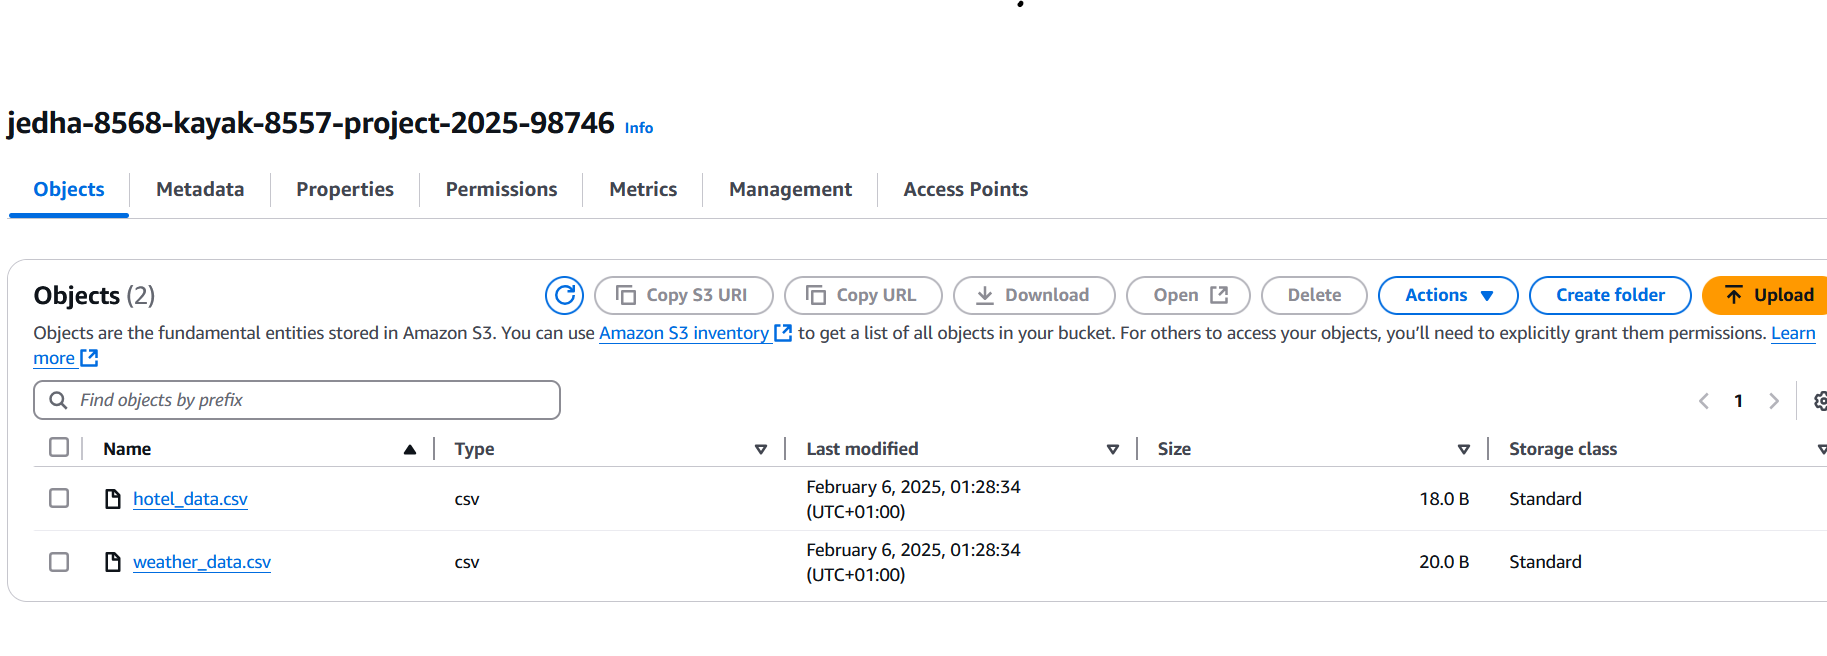

3. ETL : Extract, Tranform and Load Data to AWS RDS Data Warehouse

3.1 EXTRACT